In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

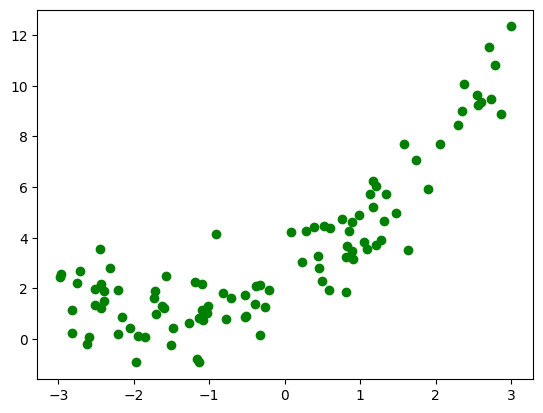

In [2]:
X = 6 * np.random.rand(100 , 1) - 3
y = 0.5 * X**2 + 1.5* X + 2 +np.random.randn(100 , 1)
# Quadratic Equation used  
plt.scatter(X, y , color = 'green')

In [3]:
print(X.shape , y.shape)

(100, 1) (100, 1)


In [4]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.25 , random_state=42)


In [5]:
from sklearn.linear_model import  LinearRegression
regression_1 = LinearRegression()

In [6]:
print(X_train.shape, y_train.shape)  # Both shapes should match in number of rows
regression_1.fit(X_train, y_train)  # Now try fitting again


(75, 1) (75, 1)


LinearRegression()

In [7]:
from sklearn.metrics import r2_score
score  = r2_score(y_test , regression_1.predict(X_test))
score

0.5839733341144524

Text(0, 0.5, 'y')

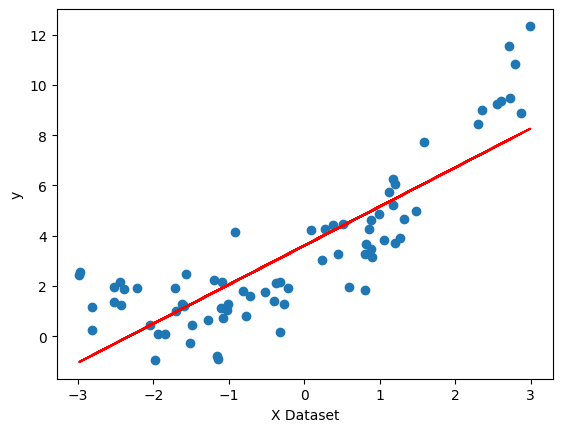

In [8]:
plt.plot(X_train , regression_1.predict(X_train) , color = 'r')
plt.scatter(X_train , y_train)
plt.xlabel("X Dataset")
plt.ylabel("y")

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 2 , include_bias= True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [10]:
X_train_poly

array([[ 1.00000000e+00, -1.71711743e+00,  2.94849229e+00],
       [ 1.00000000e+00, -1.19120001e+00,  1.41895746e+00],
       [ 1.00000000e+00,  1.12653027e+00,  1.26907045e+00],
       [ 1.00000000e+00,  1.20919959e+00,  1.46216366e+00],
       [ 1.00000000e+00,  3.87110320e-01,  1.49854400e-01],
       [ 1.00000000e+00, -3.96749301e-01,  1.57410008e-01],
       [ 1.00000000e+00,  1.17354214e+00,  1.37720115e+00],
       [ 1.00000000e+00, -1.01199536e+00,  1.02413460e+00],
       [ 1.00000000e+00,  1.20792341e+00,  1.45907896e+00],
       [ 1.00000000e+00, -3.77492133e-01,  1.42500310e-01],
       [ 1.00000000e+00, -2.51841349e+00,  6.34240651e+00],
       [ 1.00000000e+00,  1.47992304e+00,  2.19017221e+00],
       [ 1.00000000e+00, -3.26273701e-01,  1.06454528e-01],
       [ 1.00000000e+00,  2.80827752e-01,  7.88642264e-02],
       [ 1.00000000e+00, -7.17134150e-01,  5.14281390e-01],
       [ 1.00000000e+00, -2.51674947e+00,  6.33402790e+00],
       [ 1.00000000e+00,  8.10318426e-01

In [11]:
X_test_poly

array([[ 1.        ,  1.63485779,  2.67276   ],
       [ 1.        , -0.52211142,  0.27260034],
       [ 1.        ,  0.75569677,  0.57107761],
       [ 1.        , -2.61679496,  6.84761588],
       [ 1.        , -2.21064094,  4.88693335],
       [ 1.        ,  2.0559218 ,  4.22681445],
       [ 1.        , -2.15968148,  4.6642241 ],
       [ 1.        ,  0.49103983,  0.24112011],
       [ 1.        , -2.39403145,  5.7313866 ],
       [ 1.        , -1.73199132,  2.99979394],
       [ 1.        ,  1.74197752,  3.03448569],
       [ 1.        ,  2.37886242,  5.65898642],
       [ 1.        , -2.71768038,  7.38578667],
       [ 1.        ,  0.44945124,  0.20200642],
       [ 1.        , -1.14249102,  1.30528573],
       [ 1.        ,  2.55207294,  6.51307629],
       [ 1.        , -2.75267378,  7.57721292],
       [ 1.        ,  1.08623715,  1.17991114],
       [ 1.        ,  1.90156413,  3.61594612],
       [ 1.        , -2.31899779,  5.37775075],
       [ 1.        , -2.44656533,  5.985

In [12]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly , y_train)
y_pred  = regression.predict(X_test_poly)
score = r2_score(y_test , y_pred)
print(score)


0.8447284111727027


In [13]:
print(regression.coef_)

[[0.         1.59294328 0.4742914 ]]


Text(0, 0.5, 'y')

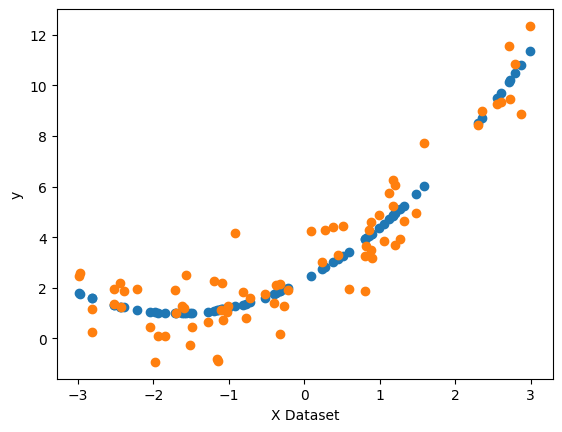

In [14]:
plt.scatter(X_train , regression.predict(X_train_poly))
plt.scatter(X_train , y_train)
plt.xlabel("X Dataset")
plt.ylabel("y")

## PipeLine 

In [15]:
from sklearn.pipeline import Pipeline


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


def poly_regression(X_train, y_train, X_test, y_test, degree):
    # Generate a range of values for smooth prediction
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    # Define polynomial regression pipeline
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    
    # Fit model on training data
    poly_regression.fit(X_train, y_train)
    
    # Predict using the model for smooth curve
    y_pred_new = poly_regression.predict(X_new)
    
    # Plot prediction curve
    plt.plot(X_new, y_pred_new, 'r', label=f"Degree {degree}")
    
    # Plot training and test data as scatter plots
    plt.scatter(X_train, y_train, color="blue", label="Training data")
    plt.scatter(X_test, y_test, color="green", label="Test data")
    
    # Final plot details
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4, 4, np.min(y_train)-1, np.max(y_train)+2])
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.show()

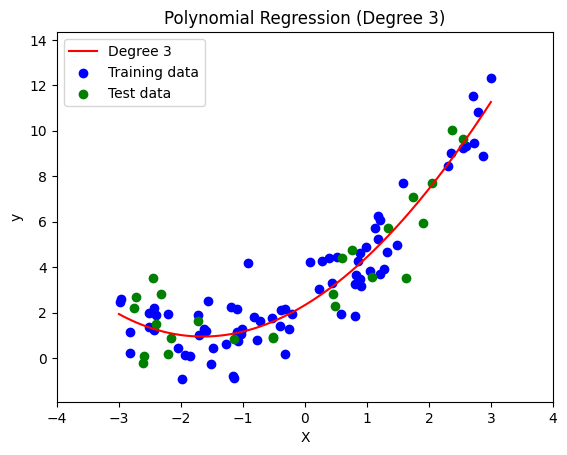

In [17]:
poly_regression(X_train, y_train, X_test, y_test, 3)